In [65]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load, low_memory=False)
city_df
ride_df = pd.read_csv(ride_data_to_load, low_memory=False)
ride_df
# Combine the data into a single dataset
merge_table = pd.merge(ride_df, city_df, on="city", how="left")
merge_table
# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


[20, 25, 30, 35, 40]

## Bubble Plot of Ride Sharing Data

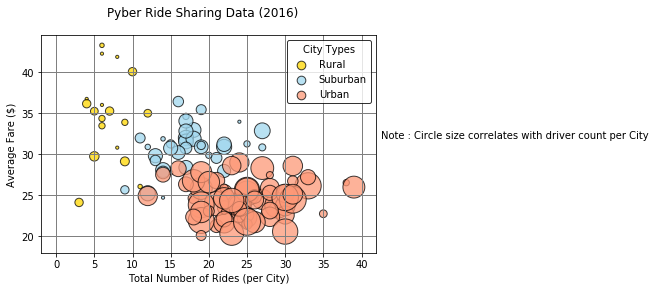

In [80]:
#Group the data by city
grouped_df =merge_table.groupby(['city'])
#Get ride count, driver count, avg fare and city type for each city
ride_count=grouped_df["ride_id"].count()
driver_count=grouped_df["driver_count"].mean()
avg_fare=grouped_df["fare"].mean()
city_type = city_df.set_index('city')['type']
#Create df with the 4 fields above
main_table = pd.DataFrame({
    "Ride Count": ride_count,
    "Average Fare": avg_fare,
    "Driver Count": driver_count,
    "City Type": city_type})

#separate df based on city types
rural = main_table[main_table['City Type'] == 'Rural']
suburban = main_table[main_table['City Type'] == 'Suburban']
urban = main_table[main_table['City Type'] == 'Urban']

#Create a color dict
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#A1D7EE', 'Light Coral':'#FD9877'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

#Set title, labels and annotations
plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.annotate('Note : Circle size correlates with driver count per City',
            xy=(1.4, 0.5), xytext=(5, 5),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=10, ha='center', va='bottom')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')



#Print plot
plt.scatter(rural['Ride Count'], rural['Average Fare'], s = rural['Driver Count']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Ride Count'], suburban['Average Fare'], s = suburban['Driver Count']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Ride Count'], urban['Average Fare'], s = urban['Driver Count']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#Set legend
lgnd = plt.legend(frameon = True, edgecolor = 'black', title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

#Set reference lines
for i in list(np.arange(20, 41, 5)):
    plt.axhline(i,linewidth=1, color='grey')
for i in list(np.arange(0, 41, 5)):    
    plt.axvline(i,linewidth=1, color='grey')

plt.show()

## Total Fares by City Type

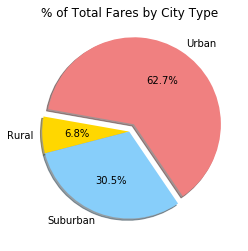

In [59]:
#Group the data by city
grouped_df2 =merge_table.groupby(['type'])
#Get total fare
total_fare=grouped_df2["fare"].sum()
#Create df to contain the data
Fare_by_type = pd.DataFrame({
    "Total Fare": total_fare})
Fare_by_type
# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(Fare_by_type["Total Fare"],labels=["Rural","Suburban","Urban"], colors= ["gold", "lightskyblue", "lightcoral"],
        explode = (0, 0, 0.1),autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure
plt.savefig("../Images/Total_fare_by_type.png")

## Total Rides by City Type

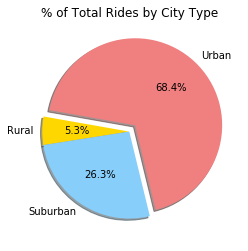

In [60]:
#Get total rides
total_ride=grouped_df2["ride_id"].count()
#Create df to contain the data
Rides_df = pd.DataFrame({
    "Total Ride": total_ride})

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(Rides_df["Total Ride"],labels=["Rural","Suburban","Urban"], colors= ["gold", "lightskyblue", "lightcoral"],
        explode = (0, 0, 0.1),autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure
plt.savefig("../Images/Total_ride_by_type.png")

## Total Drivers by City Type

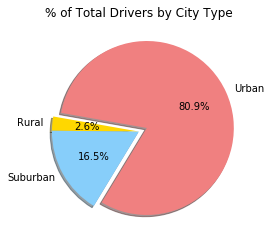

In [61]:
#group city date by city types
grouped_df3 =city_df.groupby(['type'])
#Get total driver
total_driver=grouped_df3["driver_count"].sum()
#Create df to contain the data
driver_df = pd.DataFrame({
    "Total Driver": total_driver})

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(driver_df["Total Driver"],labels=["Rural","Suburban","Urban"], colors= ["gold", "lightskyblue", "lightcoral"],
        explode = (0, 0, 0.1),autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure
plt.savefig("../Images/Total_driver_by_type.png")